# CMSC320 Final Project: Analyzing Food Price Data
## By Richard Zhou and Daniel Zhu
<!--Rubric: https://cmsc320.github.io/files/cmsc320_f2021_final_rubric.pdf
1. Motivation. Does the tutorial make the reader believe the topic is relevant or important (i) in general and (ii) with respect to data science?
2. Understanding. After reading through the tutorial, does an uninformed reader feel informed about the topic? Would a reader who already knew about the topic feel likes/he learned more about it?
3. Other resources. Does the tutorial link out to other resources (on the web, in books, etc) that would give a lagging reader additional help on specific topics, or an advanced reader the ability to dive more deeply into a specific application area or technique? 2
4. Prose. Does the prose portion of the tutorial actually add to the content of the deliverable?
5. Code. Is the code well written, well documented, reproducible, and does it help the reader understand the tutorial? Does it give good examples of specific techniques?
6. Subjective evaluation. If somebody linked to this tutorial from, say, Hacker News, would people actually read through the entire thing?-->



# Introduction
Food prices are an integral part of the lives of every individual. By looking at food prices, one can gauge the relative economic situation of a nation and see how the average cost of living changes over time. Specifically, due to resource shortages caused by the coronavirus we were curious to see if we could find trends in prices caused by Covid 19 or other significant events.
<br><br>
In this tutorial, we will be examining the changes in food prices over time from 1974 to 2020 and examining the average change in price paid for different types of food, from meats such as pork and beef to fruits and vegetables to sweets. Average change in price paid by urban consumers is known as the Consumer Price Index (CPI), measured in percentage relative to a base year (100%). Read more about CPI at (<a href="www.bls.gov/cpi/">bls.gov</a>). The CPI "is calculated by taking price changes for each item in the predetermined basket of goods and averaging them" (<a href="https://www.investopedia.com/terms/c/consumerpriceindex.asp#:~:text=The%20Consumer%20Price%20Index%20(CPI)%20is%20a%20measure%20that%20examines,of%20goods%20and%20averaging%20them.">investopedia.com</a>) (eg. fruit CPI might include changes in cost of apples, bannanas, fresh and processed fruit, etc). CPI changes are associated with cost of living.
<br><br>
The data comes from <a href="www.ers.usda.gov/data-products/food-price-outlook.aspx.">ers.usda.gov</a> The CPI for food measures the changes in retail price of food items over time. <br> <br>
The data table contains the percent change in CPI annually for various food items (<a href="https://www.investopedia.com/terms/r/reference_base_period.asp">investopedia.com</a>). <br>
##### CPI Annual Percent Change = (CPI(year) - CPI(previous year))/CPI(previous year) <br>
This is simply the change in consumer price of goods by year. A high annual percent change in CPI would indicate that food has gotten significantly more expensive compared to the year before. A percent change of 0 would mean the food prices have not changed, and a negative percent change in CPI would mean that the price of the item has decreased from the previous year.
<br><br>
For the rest of the paper, when we refer to CPI, we are refering to the annual percent change in CPI unless otherwise stated.

# Getting the Data
For starters, we will want to import some useful python libraries. These libraries will help us analyze and visualize data.

In [61]:
# Useful python libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import figure

Now we need to get our data. Our data comes from <a href="www.ers.usda.gov/data-products/food-price-outlook.aspx">ers.usda.gov</a>, "Annual percent changes in selected Consumer Price Indexes, 1974 through 2020." The initial dataset is in included in our Github repository as "historicalcpi-1.xlsx."
<br> <br>
The CPIDataCleaned.xlsx simply removes some of the unnecessary rows and columns (ie. contact info, source info) so the data is read properly when using pandas.read_excel(). You can download the data directly from the cite itself and remove the extra rows and columns in excel or use the provided CPIDataCleaned.xlsx file. We removed these extra rows and columns in excel.

In [62]:
# First, getting the data from https://www.ers.usda.gov/data-products/food-price-outlook.aspx
# We will be looking at the historical CPI to the changes to food prices over time from 1974 to 2020

# CPIDataCleaned is an excel file that removes some of the unnecessary rows/columns from the original dataset

data = pd.read_excel("CPIDataCleaned.xlsx")
data # take a look at our dataframe

,Consumer Price Index item,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,All food,14.3,8.5,3.0,6.3,9.9,11.0,8.6,7.8,4.1,...,3.7,2.6,1.4,2.4,1.9,0.3,0.9,1.4,1.9,3.4
1,Food away from home,12.7,9.4,6.8,7.6,9.1,11.1,9.9,9.0,5.4,...,2.3,2.8,2.1,2.4,2.9,2.6,2.3,2.6,3.1,3.4
2,Food at home,14.9,8.2,2.1,5.9,10.5,10.8,8.1,7.2,3.5,...,4.8,2.5,0.9,2.4,1.2,-1.3,-0.2,0.4,0.9,3.5
3,"Meats, poultry, and fish",2.2,8.5,0.9,-0.6,16.7,14.9,3.7,4.1,4.1,...,7.4,3.6,2.1,7.2,1.9,-3.5,-0.1,0.7,1.0,6.3
4,Meats,1.8,8.5,0.2,-2.3,18.6,17.0,2.9,3.6,4.9,...,8.8,3.4,1.2,9.2,3.0,-4.4,-0.6,0.4,1.3,7.4
5,Beef and veal,2.9,1.0,-3.2,-0.7,22.9,27.4,5.7,0.8,1.4,...,10.2,6.4,2.0,12.1,7.2,-6.3,-1.2,1.4,1.6,9.6
6,Pork,-0.5,22.4,1.3,-5.4,12.9,1.6,-3.3,9.3,12.8,...,8.5,0.3,0.9,9.1,-3.9,-4.1,0.6,-0.4,1.2,6.3
7,Other meats,3.1,5.9,5.9,-0.6,17.7,14.7,3.8,4.3,3.0,...,6.4,1.7,-0.1,3.9,4.1,-0.9,-0.9,-0.4,0.9,4.4
8,Poultry,-5.1,10.5,-4.1,0.7,10.4,4.9,5.2,4.1,-1.7,...,2.9,5.5,4.7,2.0,0.4,-2.7,0.2,0.3,-0.3,5.6
9,Fish and seafood,15.3,8.5,11.7,10.8,9.4,9.7,9.2,8.3,3.6,...,7.1,2.4,2.5,5.8,-0.9,-0.7,1.2,2.1,1.6,3.3


You should now have your data stored in a pandas dataframe (called "data" in the example code) as seen above.

# Data Wrangling


Let's manipulate our data table a bit to make it easier to do our analysis. <br> <br>
We'll start by converting our 'Consumer Price Index item' column to our index column.

In [63]:
# convert 'Consumer Price Index item' to index
data.set_index('Consumer Price Index item', inplace=True)

Now if we want to get data for a specific food type, we can search it up by name.

Additionally, you might notice we have columns like "All food" and "Fruits and vegetables" broken in sub categories of "Fresh fruits and vegetables", "fresh fruits", etc. These columns aggregate the data from multiple different rows (ie. "All food" is CPI of all food items, "Fresh fruits and vegetables" includes data from "Fresh Fruit" and "Fresh vegetables").
<br><br>
We want to take a look at the distribution of individual categories, and keeping the aggregated rows will skew the results. We'll move the aggregated data into its own set.
<br><br>
To determine if a column is a subset of another row or not, we can take a look at the original data table (in excel) where
tabs are used to determine if a row belongs under another row <br>
.tab {
            tab-size: 4;
        }
For example <br>
<pre class = tab>
'Fruits and vegetables'<br>
    'Fresh fruits and vegetables'<br>
        'Fresh fruits'<br>
        'Processed vegetables'<br>
    'Processed fruits and vegetables'
</pre>
<br>
'Fruits and vegetables' aggregates 'Fresh fruits and vegetables' and 'Processed fruits and vegetables' (ie. 'Fresh fruits and
vegetables' and 'Processed fruits and vegetables' are a subset under 'Fruits and vegetables')
Similar logic applies for 'Fresh fruits and vegetables' wich includes 'Fresh fruits' and 'Processed vegetables'
<br><br>
The aggregated columns in our dataset are
'All food', 'Food at home', 'Meats, poultry, and fish', 'Meats ', 'Fruits and vegetables', 'Fresh fruits and vegetables'

The non aggregated columns in our dataset are
'Food away from home', 'Beef and veal', 'Pork', 'Other meats', 'Poultry', 'Fish and seafood', 'Eggs', 
'Dairy products', 'Fats and oils', 'Fresh fruits  ', 'Fresh vegetables', 'Processed fruits and vegetables', 'Sugar and sweets',
'Cereals and bakery products', 'Nonalcoholic beverages', 'Other foods'

In [66]:
data_aggregated_rows = data.copy()

# we'll store the aggregated rows in a seperate data table 'data_aggregated_rows'
# drop the rows we don't want for each data table
# for aggregated data, we want to drop all the nonaggregated rows, and vice versa for the 'data' data table
data_aggregated_rows.drop(labels = [
'Food away from home', 'Beef and veal', 'Pork', 'Other meats', 'Poultry', 'Fish and seafood', 'Eggs', 
'Dairy products', 'Fats and oils', 'Fresh fruits  ', 'Fresh vegetables', 'Processed fruits and vegetables', 'Sugar and sweets',
'Cereals and bakery products', 'Nonalcoholic beverages', 'Other foods'
], inplace=True)

data.drop(labels = ['All food', 'Food at home', 'Meats, poultry, and fish', 'Meats ', 'Fruits and vegetables', 'Fresh fruits and vegetables'
], inplace=True)

# now data_aggregated_rows has the aggregated data rows
# data only has the lowest level rows
print('Aggregated items')
data_aggregated_rows.head()

KeyError: "['All food' 'Food at home' 'Meats, poultry, and fish' 'Meats '\n 'Fruits and vegetables' 'Fresh fruits and vegetables'] not found in axis"

In [67]:
print('Non aggregated items')
data.head()

Non aggregated items


,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Consumer Price Index item,,,,,,,,,,,,,,,,,,,,,
Food away from home,12.7,9.4,6.8,7.6,9.1,11.1,9.9,9.0,5.4,4.4,...,2.3,2.8,2.1,2.4,2.9,2.6,2.3,2.6,3.1,3.4
Beef and veal,2.9,1.0,-3.2,-0.7,22.9,27.4,5.7,0.8,1.4,-1.5,...,10.2,6.4,2.0,12.1,7.2,-6.3,-1.2,1.4,1.6,9.6
Pork,-0.5,22.4,1.3,-5.4,12.9,1.6,-3.3,9.3,12.8,-0.9,...,8.5,0.3,0.9,9.1,-3.9,-4.1,0.6,-0.4,1.2,6.3
Other meats,3.1,5.9,5.9,-0.6,17.7,14.7,3.8,4.3,3.0,-0.4,...,6.4,1.7,-0.1,3.9,4.1,-0.9,-0.9,-0.4,0.9,4.4
Poultry,-5.1,10.5,-4.1,0.7,10.4,4.9,5.2,4.1,-1.7,1.3,...,2.9,5.5,4.7,2.0,0.4,-2.7,0.2,0.3,-0.3,5.6


In our "data_aggregated_rows" data table, we now have all of the rows representing an aggregation of the data. In 'data', we have all the the items not representing an a set of other rows.

Our data has some missing values. Specifically you may notice that there are no entries under processed fruits and vegetables until 1999.

In [6]:
# print the first 10 entries in data['Processed fruits and vegetables'] to show they are missing
print(data.loc['Processed fruits and vegetables'][:10])
print("...")
print(data.loc['Processed fruits and vegetables'][-5:])

1974   NaN
1975   NaN
1976   NaN
1977   NaN
1978   NaN
1979   NaN
1980   NaN
1981   NaN
1982   NaN
1983   NaN
Name: Processed fruits and vegetables, dtype: float64
...
2016   -0.3
2017   -1.6
2018   -0.6
2019    1.1
2020    3.5
Name: Processed fruits and vegetables, dtype: float64


As you can see, some entries are missing.
<br> <br>
There are a couple of ways of dealing with this. For starters, we could just drop the row entirely. However, it still contains useful data so we probably don't want to delete all of it.
<br><br>
Instead we'll use mean imputation, meaning we'll take the average CPI of the year and fill in the missing columns that way. This way, the data can still be included when we graph the CPI of all of the data.

In [68]:
from sklearn.impute import SimpleImputer

# convert any missing data to np.NaN
data.replace('N/A', np.NaN)

# impute missing values using mean annual change in CPI of that year
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# we'll store it in a new data frame because we might want the original one with the NaN's later
data_mean_impute = pd.DataFrame(imp.fit_transform(data.values), index=data.index, columns = data.columns)

# we can now see the missing data has been replaced by the average value of that year
print(data_mean_impute.head())
data_mean_impute.loc['Processed fruits and vegetables'][:10]

                           1974  1975  1976  1977  1978  1979  1980  1981  \
Consumer Price Index item                                                   
Food away from home        12.7   9.4   6.8   7.6   9.1  11.1   9.9   9.0   
Beef and veal               2.9   1.0  -3.2  -0.7  22.9  27.4   5.7   0.8   
Pork                       -0.5  22.4   1.3  -5.4  12.9   1.6  -3.3   9.3   
Other meats                 3.1   5.9   5.9  -0.6  17.7  14.7   3.8   4.3   
Poultry                    -5.1  10.5  -4.1   0.7  10.4   4.9   5.2   4.1   

                           1982  1983  ...  2011  2012  2013  2014  2015  \
Consumer Price Index item              ...                                 
Food away from home         5.4   4.4  ...   2.3   2.8   2.1   2.4   2.9   
Beef and veal               1.4  -1.5  ...  10.2   6.4   2.0  12.1   7.2   
Pork                       12.8  -0.9  ...   8.5   0.3   0.9   9.1  -3.9   
Other meats                 3.0  -0.4  ...   6.4   1.7  -0.1   3.9   4.1   
Poul

1974    15.220000
1975     9.373333
1976     2.500000
1977     7.340000
1978    10.400000
1979     9.780000
1980     7.793333
1981     7.893333
1982     2.960000
1983     1.380000
Name: Processed fruits and vegetables, dtype: float64

In [69]:
# We are transposing the dataframe because it makes it easier to create a violin plot of CPI for an item based on year
data_t = data_mean_impute.transpose()
data_t.head()

Consumer Price Index item,Food away from home,Beef and veal,Pork,Other meats,Poultry,Fish and seafood,Eggs,Dairy products,Fats and oils,Fresh fruits,Fresh vegetables,Processed fruits and vegetables,Sugar and sweets,Cereals and bakery products,Nonalcoholic beverages,Other foods
1974,12.7,2.9,-0.5,3.1,-5.1,15.3,0.4,18.6,41.9,8.7,7.3,15.220000,52.4,29.9,19.3,21.4
1975,9.4,1.0,22.4,5.9,10.5,8.5,-1.8,3.1,10.7,6.8,-1.1,9.373333,26.1,11.3,15.0,12.8
1976,6.8,-3.2,1.3,5.9,-4.1,11.7,9.2,8.1,-12.5,-0.2,4.3,2.500000,-11.3,-2.2,19.6,4.1
1977,7.6,-0.7,-5.4,-0.6,0.7,10.8,-3.2,2.7,10.1,14.9,12.6,7.340000,5.0,1.6,50.6,3.4
1978,9.1,22.9,12.9,17.7,10.4,9.4,-5.4,6.8,9.6,19.5,8.0,10.400000,12.3,9.0,5.8,8.0


# Exploratory Data Analysis
Let's start doing some initial data analysis. We want to look at all of the data to see if we notice any trends to analyze further. To do so, we create a violin plot of the CPI values for all items by year to plot the distribution of points to see how the CPI of all food items shifts over time and see if there are any discernable trends.
<br><br>
Using a violin plot, we can get an idea of the general trend line (by including the mean) and see if the distribution of CPI is skewed or symmetric for all the years or changes depending on the year. We can also note whether there is significant changes in the variance of CPI by year.
<br> <br>
We also plot a horizontal line y = 0. This lets us see if the CPI is generally positive (meaning prices rise), negative (prices decrease), or vary (prices sometimes are increasing and are sometimes decreasing).

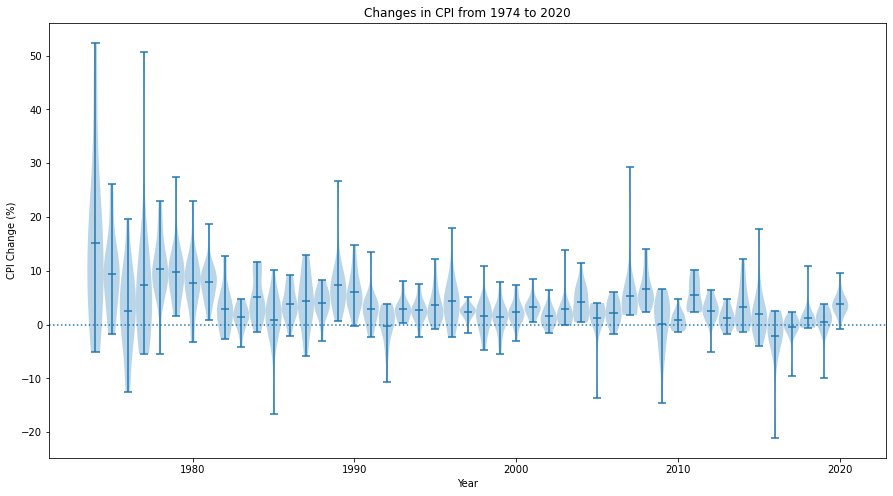

In [9]:
# Creating the violin plot
# list of years
years = list(data_t.index)
# list of lists - each of the sublists are the CPI change for the corresponding year
cpi_year = data_t.values.tolist()

fig, ax = plt.subplots(figsize=(15, 8))

ax.violinplot(cpi_year,years, widths = 1, showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("CPI Change (%)")
ax.set_title("Changes in CPI from 1974 to 2020")

# plot a dotted horizontal line at y = 0
ax.axhline(y=0, linestyle=':')

This initial graph allows us to see a couple of things.
<br><br>
The CPI seems to oscillate up and down over time (ie. like a sine wave), but generally stays well above 0. This seems to suggest that the price of food increases on average, which seems reasonable since we would expect prices to increase over time due to inflation. Most of the violins seem to be unimodal.
<br><br>
The variance seems to change a lot from year to year. Sometimes the variance is very large and skewed, sometimes the variance is fairly small and symmetric. Additionally, when the violin plot for a year is skewed towards a high CPI, it appears the general trend of CPI is 'oscillating up', and when the violin plot for a year is skewed down, the general CPI is trend is on a down turn.
<br><br>
This could potentially mean that certain foods are extremely volitile. When food prices as a whole are increasing quickly, certain foods increase by substantially more. When food prices are more stable, the cost of certain food items decreases signficantly. Perhaps a couple of food item prices tend to vary a lot from year to year while other food item prices are increasing at a consitent rate.

Next, let's take a look at the CPI for each food item seperately.

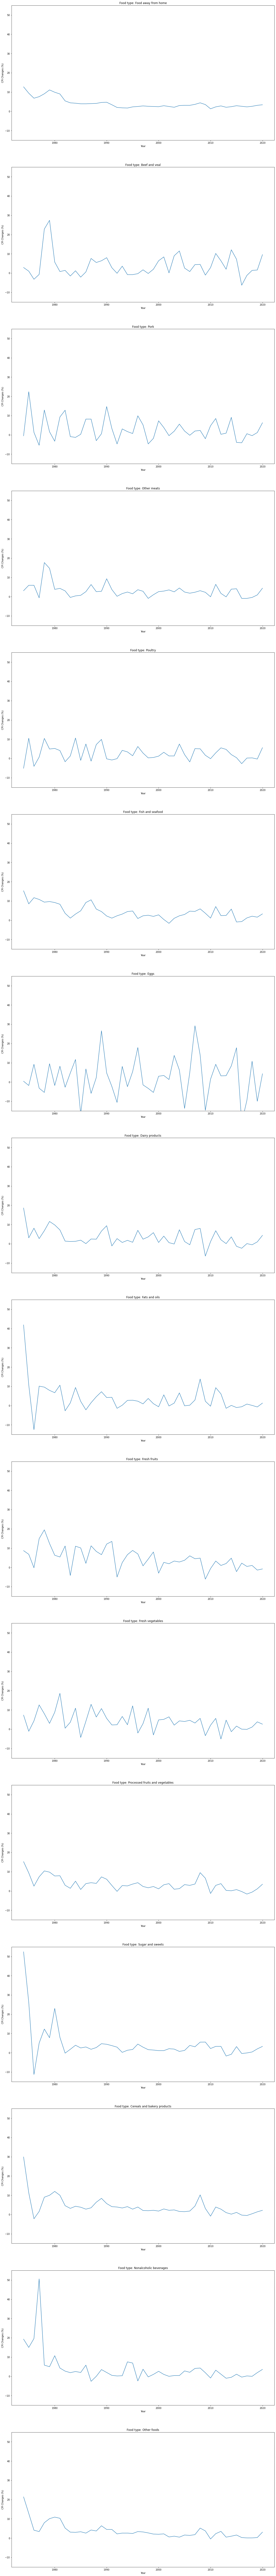

In [70]:
# Plot a graph for CPI of each food item
figure, axis = plt.subplots(len(data_t.columns), figsize = (20,200))
for i, col in enumerate(data_t.columns):
    axis[i].plot(data_t.index, data_t[col])
    axis[i].set_ylim(-15, 55) # make the scale the same so it's easier to compare graphs to each other
    axis[i].set_title(f'Food type: {col}')
    axis[i].set_xlabel('Year')
    axis[i].set_ylabel('CPI Changes (%)')

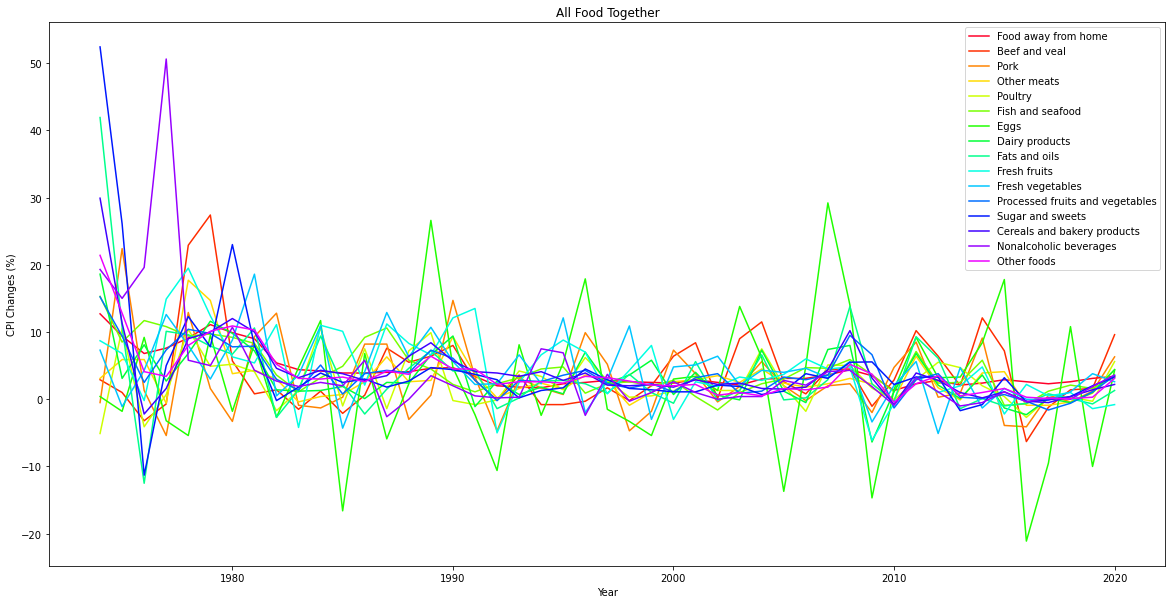

In [58]:
# Plotting the CPI changes of all items on one graph
NUM_COLORS = len(data_t.columns)
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for col in data_t.columns:
    plt.plot(data_t.index, data_t[col], label = col)
plt.title(f'All Food Together')
plt.xlabel('Year')
plt.ylabel('CPI Changes (%)')
plt.legend()

In many of the previous graphs, the variance were very large in the late 1970s before decreasing going into the early 2000s. The graphs also showcase many dynamic changes, constantly fluctuating between positive and negative values for some of the CPI changes. There tends to be spikes around the late 1970s, late 1980s, late 2000s, and mid 2010s. Another interesting observation is that after these large spikes, the CPI change will have a large dip immediately, often becoming negative. It isn't large enough to offset the gain by the spike, but this shows how the large CPI changes are only temporary and will stabilize after each spike.

Additionally, these plots let us compare the variability in CPI between different food items. For example, it appears that the change in price of eggs tend to change wildly, while the CPI change of things like Sugar and sweets and Nonalcholic beverages are relatively stable. Additionally the CPI of different food items tend to roughly spike and fall on the same years.

<br><br>
Recall that when we've been refering to CPI, we have actually been refering the the annual percent changes in CPI. However, it may be useful to look at the 'absolute CPI' or the cumulative annual percent changes in CPI from a base year.
<br>
This is represented by the following recursive formula:
##### Absolute CPI = Absolute_CPI(previous year) + Absolute_CPI(previous_year) * CPI(year)
<br>
where we start at year=1973 and Absolute CPI(1973) = 1.
<br>
For example, an absolute CPI of 1.5 in 1980 would mean the price of the item has increased by 50% ((1.5-1) * 100) from 1973 to 1980.

      Food away from home  Beef and veal      Pork  Other meats   Poultry  \
1974             1.127000       1.029000  0.995000     1.031000  0.949000   
1975             1.232938       1.039290  1.217880     1.091829  1.048645   
1976             1.316778       1.006033  1.233712     1.156247  1.005651   
1977             1.416853       0.998990  1.167092     1.149309  1.012690   
1978             1.545787       1.227759  1.317647     1.352737  1.118010   

      Fish and seafood      Eggs  Dairy products  Fats and oils  \
1974          1.153000  1.004000        1.186000       1.419000   
1975          1.251005  0.985928        1.222766       1.570833   
1976          1.397373  1.076633        1.321810       1.374479   
1977          1.548289  1.042181        1.357499       1.513301   
1978          1.693828  0.985903        1.449809       1.658578   

      Fresh fruits    Fresh vegetables  Processed fruits and vegetables  \
1974        1.087000          1.073000                     

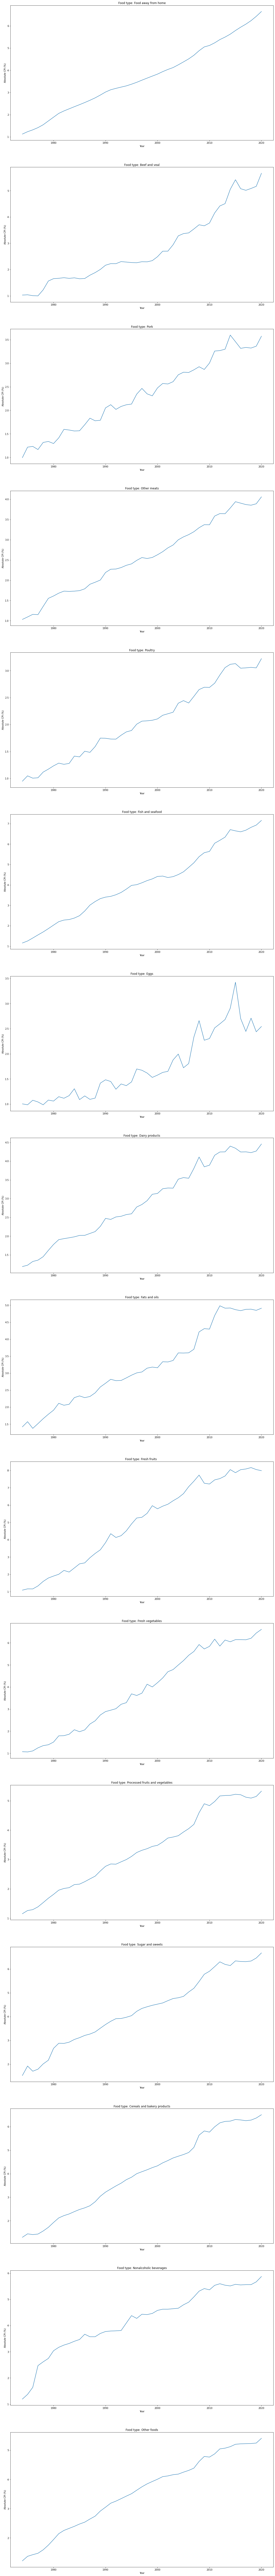

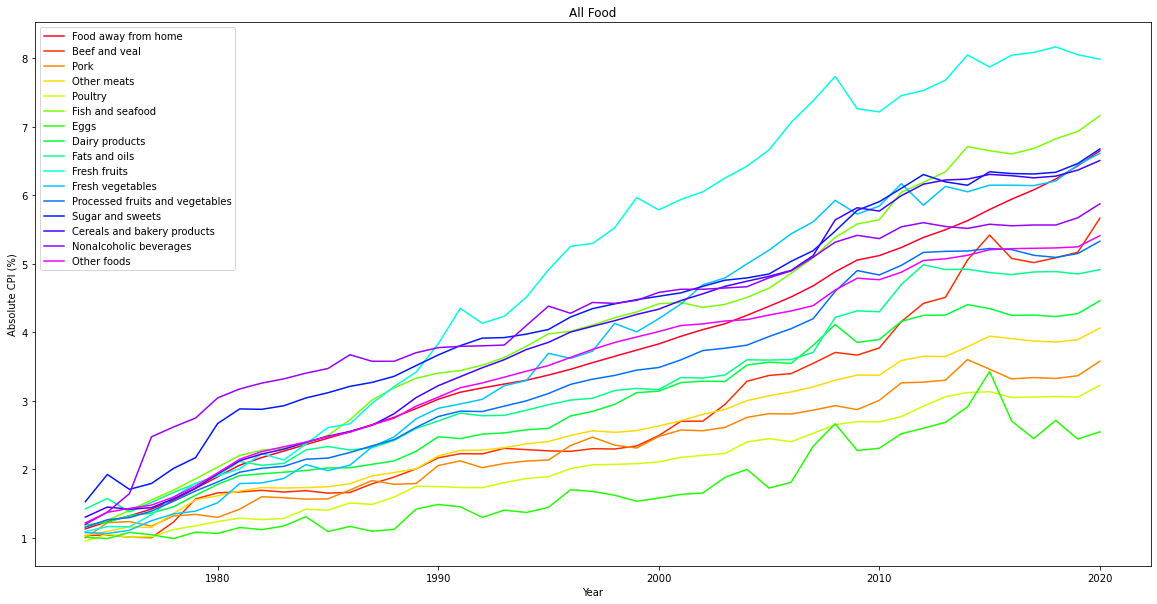

In [52]:
abs_data = pd.DataFrame()
figure, axis = plt.subplots(len(data_t.columns), figsize = (20,200))
for i, col in enumerate(data_t.columns):
    curr_val = 1
    values = []
    for val in data_t[col]:
        # Adding the absolute change to the current value
        curr_val = curr_val + curr_val*(val/100)
        values.append(curr_val)
    abs_data[col] = pd.Series(values, index = data_t.index)
    axis[i].plot(abs_data.index, abs_data[col])
    axis[i].set_title(f'Food type: {col}')
    axis[i].set_xlabel('Year')
    axis[i].set_ylabel('Absolute CPI (%)')
# Taking a look at the new data
print(abs_data.head())

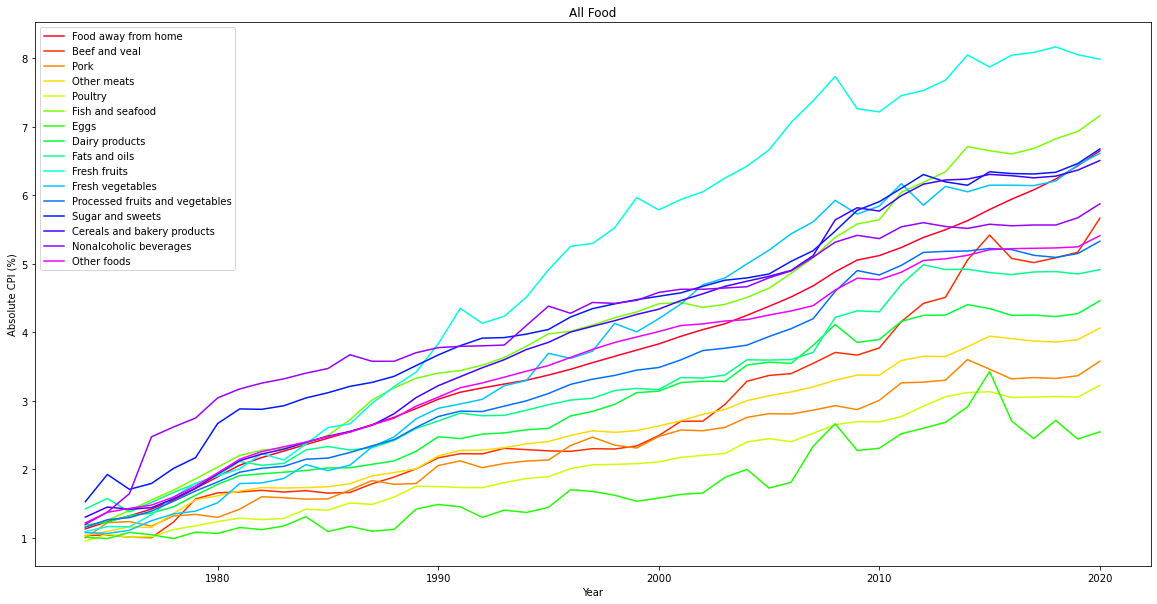

In [53]:
# Plotting all of the changes on one graph
NUM_COLORS = len(abs_data.columns)
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for col in abs_data.columns:
    plt.plot(abs_data.index, abs_data[col], label = col)
plt.title(f'All Food')
plt.xlabel('Year')
plt.ylabel('Absolute CPI (%)')
plt.legend()

The graphs above corroborate the information given by the earlier graphs, showing how the prices for all foods have been steadily increasing throughout the years (again, as expected due to inflation). Many of the graphs have a spike around 1990 and 2008 and 2016, with a shallow dip around the years leading up to 2020 after 2016. The spike around 2008 could be related to the 2008 global financial crisis. The 2008 financial crisis may have caused food prices to spike up. The data does not extend long enough to see how the COVID-19 pandemic has affected food prices, but future updates to the data may reflect price changes caused by the pandemic.
<br><br>
We can see is that some foods have been increasing in price faster than other foods. Assuming that the foods started at the same price, fresh fruits have been increasing the fastest, followed by fish and seafood. On the other hand, eggs and poultry have been rising the slowest among out of the food groups. One of the more interesting trends is that nonalcoholic beverages had a sharp increase initially before being overtaken by other food groups.
<br><br>
The overall change in food pirce appears linear. Certain events may cause to fluctuations but do not affect the overall price trends of the food.
<br><br>
However, given that the food were assumed to have all started from the same base price, the graph is not representative of the relative price differences between different types of food. <!-- ???? what are you trying to say here-->

# Analysis and Models
Our exploratory data analysis has shown that there is clear relationship between food price and year. Now, we will construct models that will allow us to predict CPI change of the specific food items.
<br><br>
First, let us find the lines of best fit for each food type using linear regression models. This will give us an idea of  general trends and let us see if we can distinguish between the food types <!-- do we do this? remove?-->.

In [74]:
# Getting lines of best fit for each of the years via linear regression
import numpy as np
from sklearn.linear_model import LinearRegression
residual_data = pd.DataFrame()
print('Lines of best fit')
for i,col in enumerate(data_t.columns):
    X = np.array(years).reshape(-1,1)
    y = np.array(data_t[col]).reshape(-1,1)
    reg = LinearRegression().fit(X, y)
    print(f'{col}:\n y = {reg.intercept_[0]} + {reg.coef_[0][0]}x\n')
    prediction = reg.predict(np.array(years).reshape(-1,1))
    residual = (np.array(data_t[col]) - prediction)
    residual_data[col] = pd.Series(residual[i], index=years)

Lines of best fit
Food away from home:
 y = 280.3948080481035 + -0.13833256244218314x

Beef and veal:
 y = 53.830396846238 + -0.02499194923391296x

Pork:
 y = 168.5140114652216 + -0.08293294877583257x

Other meats:
 y = 190.52294935732553 + -0.09386073065134953x

Poultry:
 y = 74.731145906512 + -0.03612578765690331x

Fish and seafood:
 y = 348.1468054841003 + -0.17216202526304214x

Eggs:
 y = -10.67941594299251 + 0.006603897750178298x

Dairy products:
 y = 275.3395259820797 + -0.13621694044837235x

Fats and oils:
 y = 359.45759665964914 + -0.17816032424435854x

Fresh fruits  :
 y = 450.51633188729716 + -0.2232645739543135x

Fresh vegetables:
 y = 282.9847029437222 + -0.1395978355148964x

Processed fruits and vegetables:
 y = 306.9045610702816 + -0.1518409687659928x

Sugar and sweets:
 y = 542.6377343519929 + -0.2695014316917701x

Cereals and bakery products:
 y = 392.39524651697604 + -0.19440293152343893x

Nonalcoholic beverages:
 y = 593.8868723632503 + -0.29532909616204095x

Other fo

Next, we plot the regerssion lines for the food items.

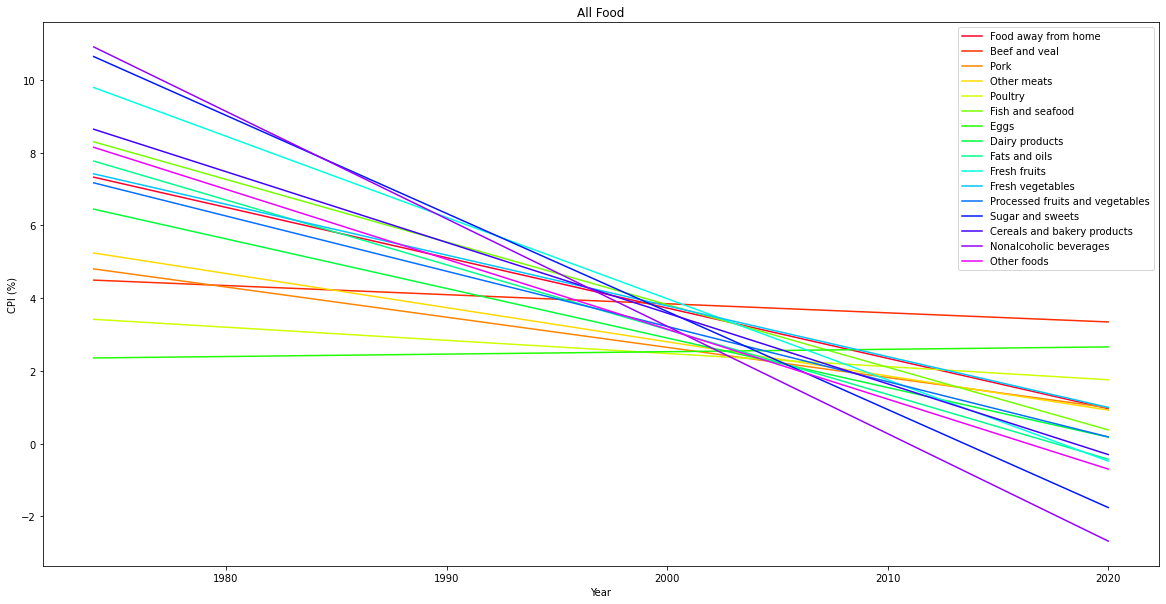

In [80]:
NUM_COLORS = len(abs_data.columns)
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for col in abs_data.columns:
    X = np.array(years).reshape(-1,1)
    y = np.array(data_t[col]).reshape(-1,1)
    reg = LinearRegression().fit(X, y)
    plt.plot(X, reg.coef_[0][0]*X + reg.intercept_[0], label = col)    

plt.title(f'All Food')
plt.xlabel('Year')
plt.ylabel('CPI (%)')
plt.legend()

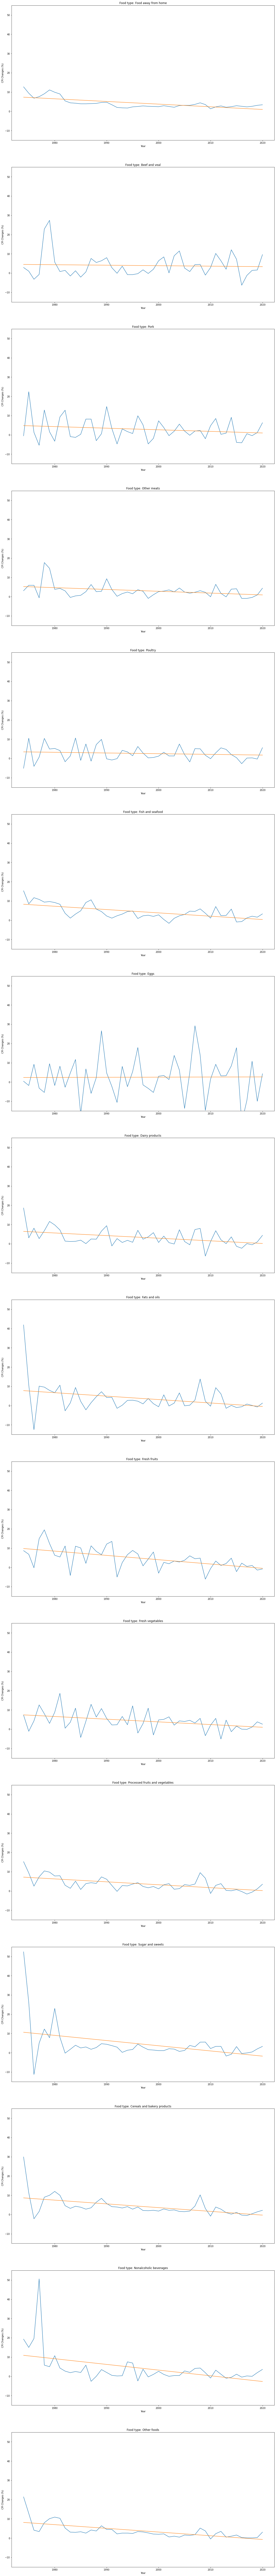

In [82]:
# plot of regression lines ontop of CPI data for each food item
figure, axis = plt.subplots(len(data_t.columns), figsize = (20,200))
for i, col in enumerate(data_t.columns):
    axis[i].plot(data_t.index, data_t[col])
    axis[i].set_ylim(-15, 55) # make the scale the same so it's easier to compare graphs to each other
    X = np.array(years).reshape(-1,1)
    y = np.array(data_t[col]).reshape(-1,1)
    reg = LinearRegression().fit(X, y)
    axis[i].plot(X, reg.coef_[0][0]*X + reg.intercept_[0], label = col)
    axis[i].set_title(f'Food type: {col}')
    axis[i].set_xlabel('Year')
    axis[i].set_ylabel('CPI Changes (%)')

In general, we can see the CPI is decreasing for most products. However, certain food products like eggs, food away from home, and fish and seafood seem to have a relatively constant CPI change. This is interesting because the CPI change of eggs tended to vary and oscillate greatly from year to year, but the overall CPI is constant.

It can also be useful to look at a plot of the residuals. The earlier graphs from our exploratory data analysis indicate there is a lot of variance in food price. <!-- ... what. why are we doing  this again?-->

In [75]:
residual_data.head() # see residuals table

,Food away from home,Beef and veal,Pork,Other meats,Poultry,Fish and seafood,Eggs,Dairy products,Fats and oils,Fresh fruits,Fresh vegetables,Processed fruits and vegetables,Sugar and sweets,Cereals and bakery products,Nonalcoholic beverages,Other foods
1974,5.37367,-1.571297,-5.138505,-1.860285,-8.374338,7.861843,-1.996302,13.106233,35.556166,0.917318,1.277403,9.719762,44.992109,23.783378,12.527371,16.136667
1975,2.07367,-3.471297,17.761495,0.939715,7.225662,1.061843,-4.196302,-2.393767,4.356166,-0.982682,-7.122597,3.873095,18.692109,5.183378,8.227371,7.536667
1976,-0.52633,-7.671297,-3.338505,0.939715,-7.374338,4.261843,6.803698,2.606233,-18.843834,-7.982682,-1.722597,-3.000238,-18.707891,-8.316622,12.827371,-1.163333
1977,0.27367,-5.171297,-10.038505,-5.560285,-2.574338,3.361843,-5.596302,-2.793767,3.756166,7.117318,6.577403,1.839762,-2.407891,-4.516622,43.827371,-1.863333
1978,1.77367,18.428703,8.261495,12.739715,7.125662,1.961843,-7.796302,1.306233,3.256166,11.717318,1.977403,4.899762,4.892109,2.883378,-0.972629,2.736667


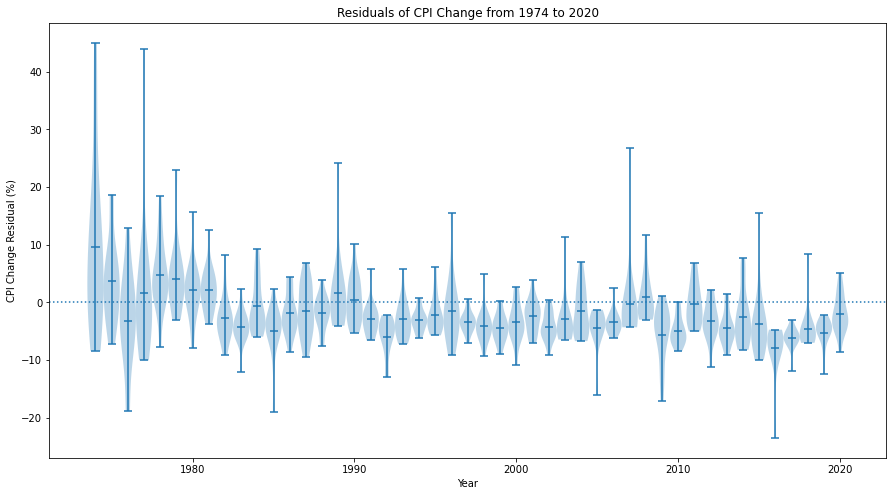

In [77]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.violinplot(residual_data.values.tolist(),years, widths = 1, showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("CPI Change Residual (%)")
ax.set_title("Residuals of CPI Change from 1974 to 2020")

# plot a dotted horizontal line at y = 0
ax.axhline(y=0, linestyle=':')

The y-intercepts are very large due to the x-axis starting from year 0 instead of 1973 as shown in our previous graphs. Aside from that, another interesting thing to note is that almost all of the coefficients are negative apart from the line of best fit for eggs. It seems that the rate food prices are increasing is decreasing (food prices are increasing less rapidly).

Regarding the residuals, we decided to graph them in a violin plot to see the distribution of the predictions for each year among all of the nonaggregated food types. We can see that the predicted model tended to underestimate the CPI change, with the median residual for each year steadily decreasing over time. In addition, there are some cases where outliers cause large skew in the display. However, these skews tended to be near the beginning of the data, which may be caused by how some products had relatively low supply compared to the demand in 1974, which have changed with improvements in production.

# Conclusion and Further Exploration
The price of food is an important factor that affects everyone in the world, which makes the analysis and prediction of these changes all the more important. By looking at and estimating CPI change in food, individuals can plan ahead for food costs, while nations can use this to determine how much to invest into agriculture and food production. Although the data we work with was relatively simple, it still provides some valuable insight into how data science requires a wide range of data to be more accurate.

For future projects, there is much more to look at regarding food CPI changes. We got the data from <a href="www.ers.usda.gov/data-products/food-price-outlook.aspx.">ers.usda.gov</a>, which also hosts data regarding changes in Producer Price Indexes, which is used to calculate economic growth, which is covered more in-depth at <a href="https://www.bls.gov/ppi/methodology-reports/comparing-the-producer-price-index-for-personal-consumption-with-the-us-all-items-cpi-for-all-urban-consumers.htm">bls.gov</a>. The ERS website also contains archived forecasts that contains predictions for CPI changes in the form of a range of values. These different data sets could be compared with the CPI data to form a more comprehensive understanding of the economic changes throughout history and can be used build a more robust prediction model. 